# **1. Import Libraries, Load and Inspect Datasets**

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df_train = pd.read_csv('survey/dataset_psycology_survey.csv')
df_pred_ = pd.read_csv('survey/submission_psycology_survey.csv')

In [5]:
df_train.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,...,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,...,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,...,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,...,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0,5.0,4.0,4.0,3.0,3.0,4.0,3.0,1.0,2.0,5.0,1.0,2.0,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,...,1.0,5.0,3.0,1.0,3.0,3.0,2.0,5.0,5.0,4.0,5.0,3.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,NaN,2.0,4.0,most of the day,2.0,4.0,3.0,3.0,4.0,4,1.0,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,5.0,2.0,3.0,3.0,4.0,4.0,3.0,1.0,4.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,...,4.0,2.0,3.0,3.0,3.0,3.0,5.0,4.0,2.0,3.0,5.0,5.0,2.0,3.0,5.0,3.0,3.0,2.0,4.0,3.0,3.0,3.0,few hours a day,4.0,3.0,4.0,3.0,3.0,2,4.0,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [6]:
df_pred_.head()

,Unnamed: 0,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,...,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,0,5.0,5.0,4.0,3.0,2.0,4.0,4.0,3.0,5.0,5.0,4.0,4.0,5.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,1.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0,2.0,4.0,3.0,4.0,1.0,2.0,4.0,5.0,4.0,3.0,...,3.0,3.0,3.0,4.0,5.0,3.0,4.0,4.0,5.0,4.0,4.0,4.0,3.0,5.0,4.0,4.0,4.0,3.0,3.0,5.0,5.0,3.0,4.0,few hours a day,3.0,2.0,3.0,3.0,2.0,3,28.0,180.0,70.0,1.0,female,right handed,masters degree,no,city,block of flats
1,1,5.0,2.0,2.0,2.0,3.0,3.0,3.0,4.0,5.0,1.0,2.0,2.0,1.0,3.0,2.0,5.0,4.0,2.0,4.0,5.0,2.0,2.0,5.0,5.0,4.0,4.0,5.0,5.0,4.0,3.0,4.0,3.0,4.0,2.0,1.0,1.0,5.0,4.0,2.0,...,3.0,3.0,3.0,5.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,5.0,3.0,3.0,2.0,3.0,3.0,5.0,5.0,3.0,3.0,few hours a day,5.0,5.0,3.0,2.0,2.0,2,20.0,155.0,44.0,0.0,female,right handed,secondary school,yes,village,house/bungalow
2,2,5.0,3.0,2.0,2.0,2.0,2.0,1.0,3.0,5.0,1.0,2.0,1.0,1.0,2.0,4.0,5.0,2.0,1.0,1.0,4.0,1.0,2.0,5.0,5.0,3.0,3.0,5.0,5.0,3.0,1.0,2.0,2.0,4.0,2.0,1.0,2.0,3.0,1.0,1.0,...,3.0,1.0,4.0,4.0,2.0,3.0,5.0,3.0,1.0,3.0,1.0,5.0,5.0,5.0,2.0,1.0,2.0,2.0,3.0,5.0,1.0,4.0,4.0,few hours a day,3.0,1.0,1.0,1.0,2.0,1,21.0,169.0,61.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats
3,3,5.0,3.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0,1.0,1.0,5.0,3.0,3.0,3.0,3.0,2.0,1.0,2.0,4.0,5.0,5.0,5.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,4.0,3.0,3.0,2.0,1.0,1.0,5.0,5.0,3.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,5.0,3.0,3.0,3.0,5.0,3.0,2.0,4.0,2.0,4.0,3.0,3.0,2.0,few hours a day,2.0,4.0,4.0,3.0,4.0,4,19.0,185.0,70.0,1.0,male,right handed,secondary school,yes,city,house/bungalow
4,4,5.0,4.0,4.0,2.0,1.0,4.0,4.0,3.0,2.0,1.0,1.0,4.0,2.0,3.0,2.0,4.0,4.0,5.0,3.0,4.0,1.0,4.0,5.0,1.0,4.0,5.0,3.0,3.0,5.0,4.0,5.0,5.0,2.0,5.0,3.0,4.0,5.0,4.0,2.0,...,3.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,5.0,4.0,4.0,4.0,4.0,2.0,3.0,5.0,3.0,4.0,4.0,3.0,few hours a day,4.0,4.0,4.0,5.0,4.0,4,23.0,179.0,77.0,1.0,male,right handed,secondary school,yes,village,house


### **Find Mismatched Columns Between Datasets**

In [7]:
train_pred = [x for x in df_train.columns if x not in df_pred_.columns]
pred_train = [x for x in df_pred_.columns if x not in df_train.columns]
print(train_pred)
print(pred_train)

['Spending on healthy eating']
['Unnamed: 0']


# **2. Perform EDA for Datasets**
> ### **2.1. Select Features and Change Columns Names**



In [8]:
new_names = {'Healthy eating':    'Lifestyle',
             'Spending on looks': 'Look',
             'Eating to survive': 'Taste'}

df_train.rename(columns={'Spending on healthy eating': 'Spend'}, inplace=True)
df_train.rename(columns=new_names, inplace=True)
df_pred_.rename(columns=new_names, inplace=True)

main_idx = [75, 93, 101, 137, 141, 142, 95, 140, 144, 146]
features = [df_train.columns.tolist()[k] for k in main_idx]
print(features)

df_train_selected = df_train[features]
y_train = df_train['Spend']
df_train_selected = pd.concat([df_train_selected, y_train], axis=1)

df_pred__selected = df_pred_[features]

['Lifestyle', 'Hypochondria', 'Health', 'Look', 'Height', 'Weight', 'Taste', 'Age', 'Gender', 'Education']


> ### **2.2. Inspect Missing Values in Datasets**

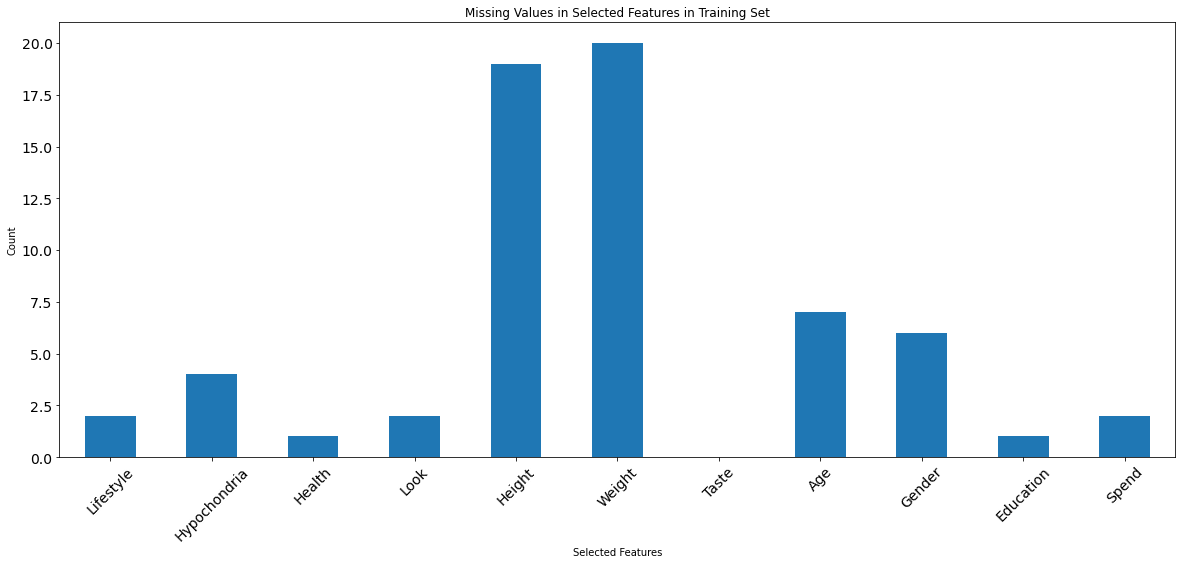

In [9]:
df_train_selected.isnull().sum().plot(kind='bar', figsize=(20,8), rot=45)
plt.tick_params(labelsize=14)
plt.ylabel('Count')
plt.xlabel('Selected Features')
plt.title('Missing Values in Selected Features in Training Set')
plt.show()

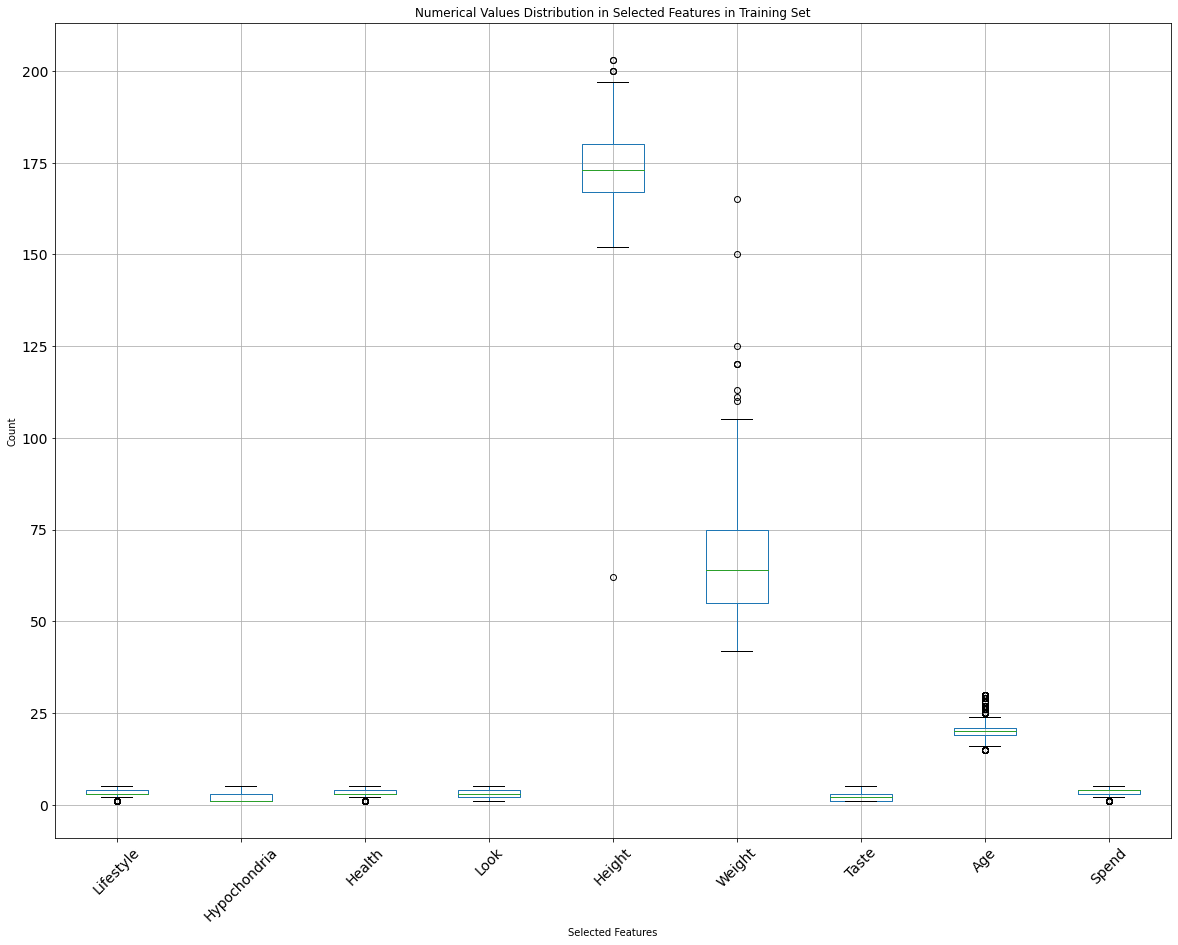

In [10]:
df_train_selected.boxplot(figsize=(20,15), rot=45)
plt.tick_params(labelsize=14)
plt.ylabel('Count')
plt.xlabel('Selected Features')
plt.title('Numerical Values Distribution in Selected Features in Training Set')
plt.show()

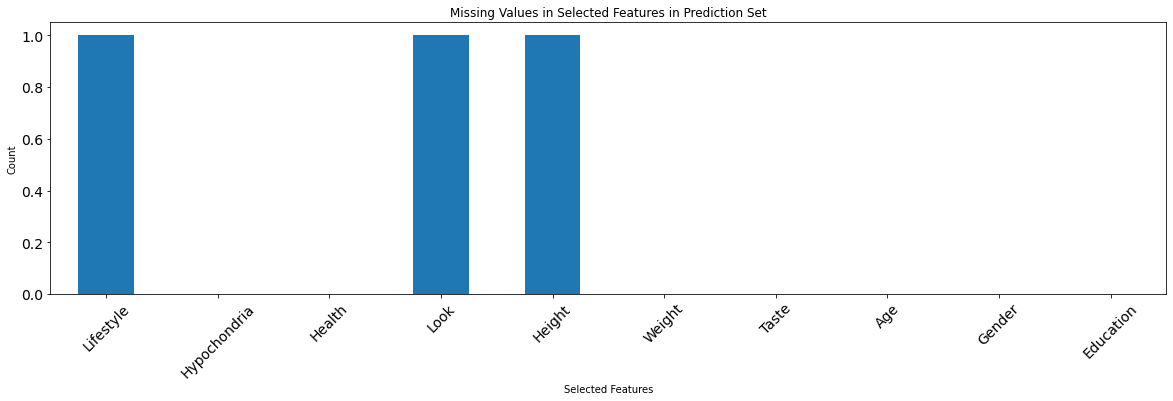

In [11]:
df_pred__selected.isnull().sum().plot(kind='bar', figsize=(20,5), rot=45)
plt.tick_params(labelsize=14)
plt.ylabel('Count')
plt.xlabel('Selected Features')
plt.title('Missing Values in Selected Features in Prediction Set')
plt.show()

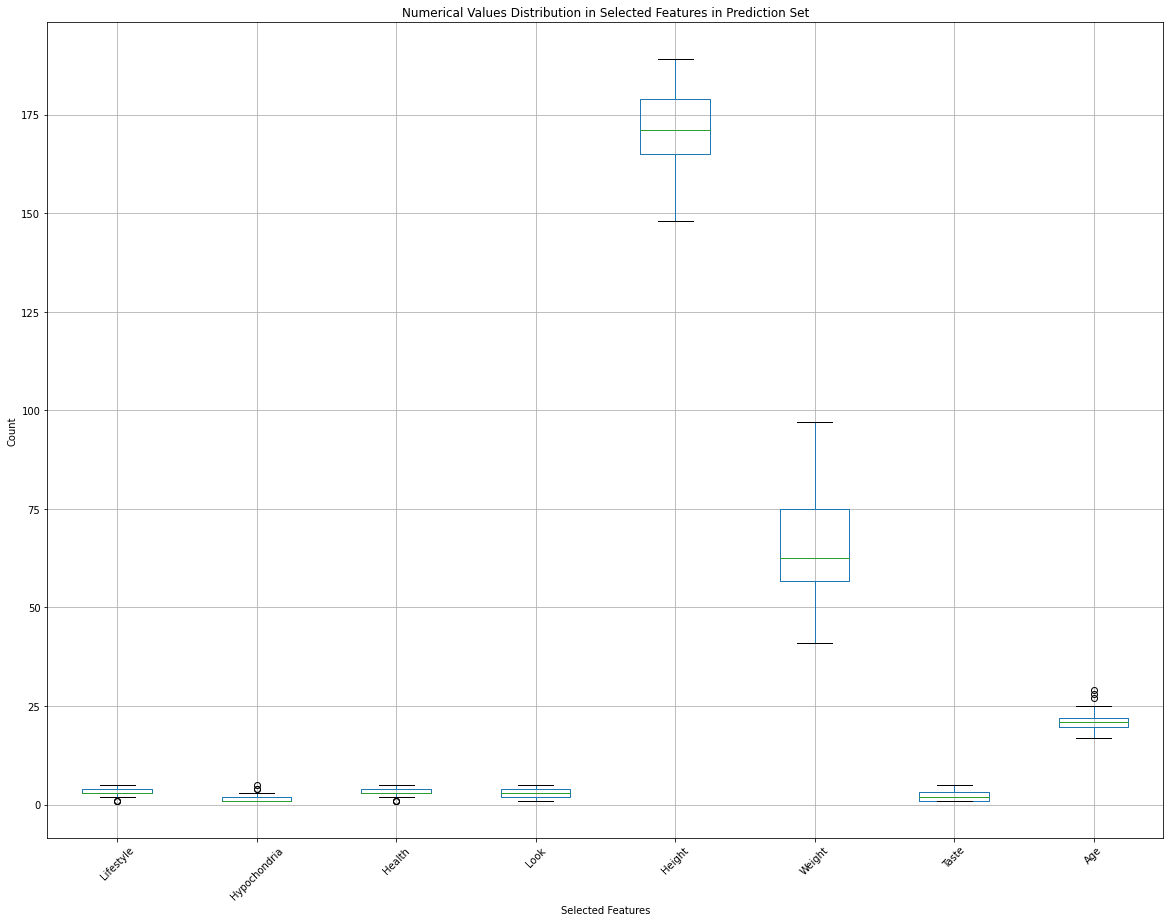

In [12]:
df_pred__selected.boxplot(figsize=(20,15), rot=45)
plt.ylabel('Count')
plt.xlabel('Selected Features')
plt.title('Numerical Values Distribution in Selected Features in Prediction Set')
plt.show()

> ### **2.3. Feature Selection and Engineering**

In [13]:
df_train_selected = df_train_selected.fillna(df_train_selected.median())
X_train = df_train_selected.iloc[:, :-1]
y_train = df_train_selected.iloc[:, -1]
X_pred_ = df_pred__selected.fillna(df_pred__selected.median())

f_gender = lambda g: 'Male' if g == 'male' else 'Female'
X_train['Gender'] = X_train['Gender'].apply(f_gender)
X_pred_['Gender'] = X_pred_['Gender'].apply(f_gender)

degrees = ['college/bachelor degree', 'masters degree', 'MS', 'doctorate degree']
f_education = lambda e: 'Degree' if e in degrees else 'Non_Degree'
X_train['Education'] = X_train['Education'].apply(f_education)
X_pred_['Education'] = X_pred_['Education'].apply(f_education)

X_train = pd.get_dummies(X_train, drop_first=True, prefix='', prefix_sep='')
X_pred_ = pd.get_dummies(X_pred_, drop_first=True, prefix='', prefix_sep='')

X_train['Taste'] = X_train['Taste'].astype(float)
X_pred_['Taste'] = X_pred_['Taste'].astype(float)

X_train['BMI'] = X_train.Weight / (X_train.Height**2)
X_pred_['BMI'] = X_pred_.Weight / (X_pred_.Height**2)
X_train.drop(columns=['Weight', 'Height'], inplace=True)
X_pred_.drop(columns=['Weight', 'Height'], inplace=True)

print(X_train.info())
print('\n' + '* ' * 30)
print(X_pred_.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Lifestyle     970 non-null    float64
 1   Hypochondria  970 non-null    float64
 2   Health        970 non-null    float64
 3   Look          970 non-null    float64
 4   Taste         970 non-null    float64
 5   Age           970 non-null    float64
 6   Male          970 non-null    uint8  
 7   Non_Degree    970 non-null    uint8  
 8   BMI           970 non-null    float64
dtypes: float64(7), uint8(2)
memory usage: 55.1 KB
None

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Lifestyle     40 non-null     float64
 1   Hypochondria  40 non-null     float64
 2   Health        40 non-null 

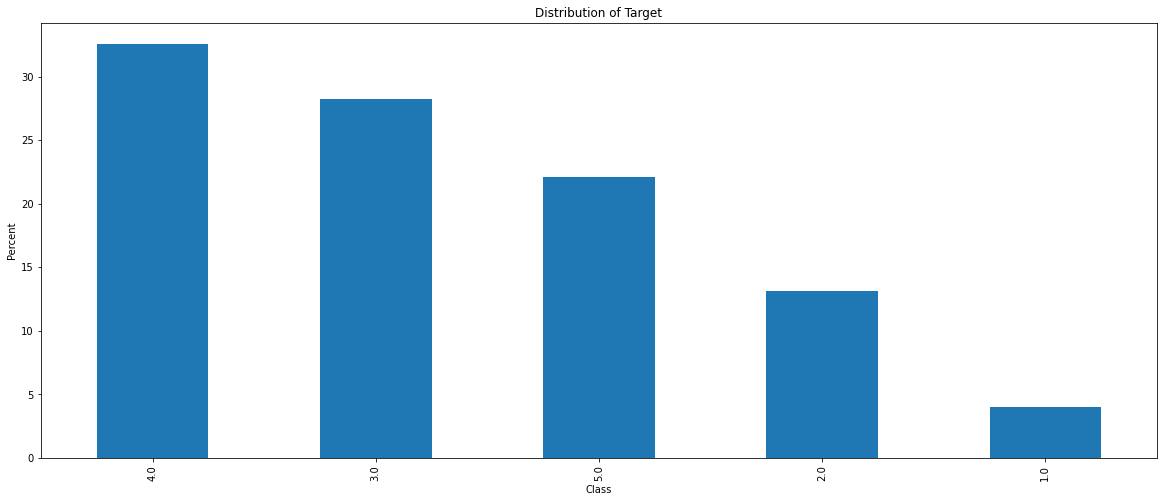

In [14]:
# y_train = y_train.apply(lambda y: y if y > 2 and y < 5 else 2)
(100 * y_train.value_counts() / len(y_train)).plot(kind='bar', figsize=(20,8))
plt.ylabel('Percent')
plt.xlabel('Class')
plt.title('Distribution of Target')
plt.show()

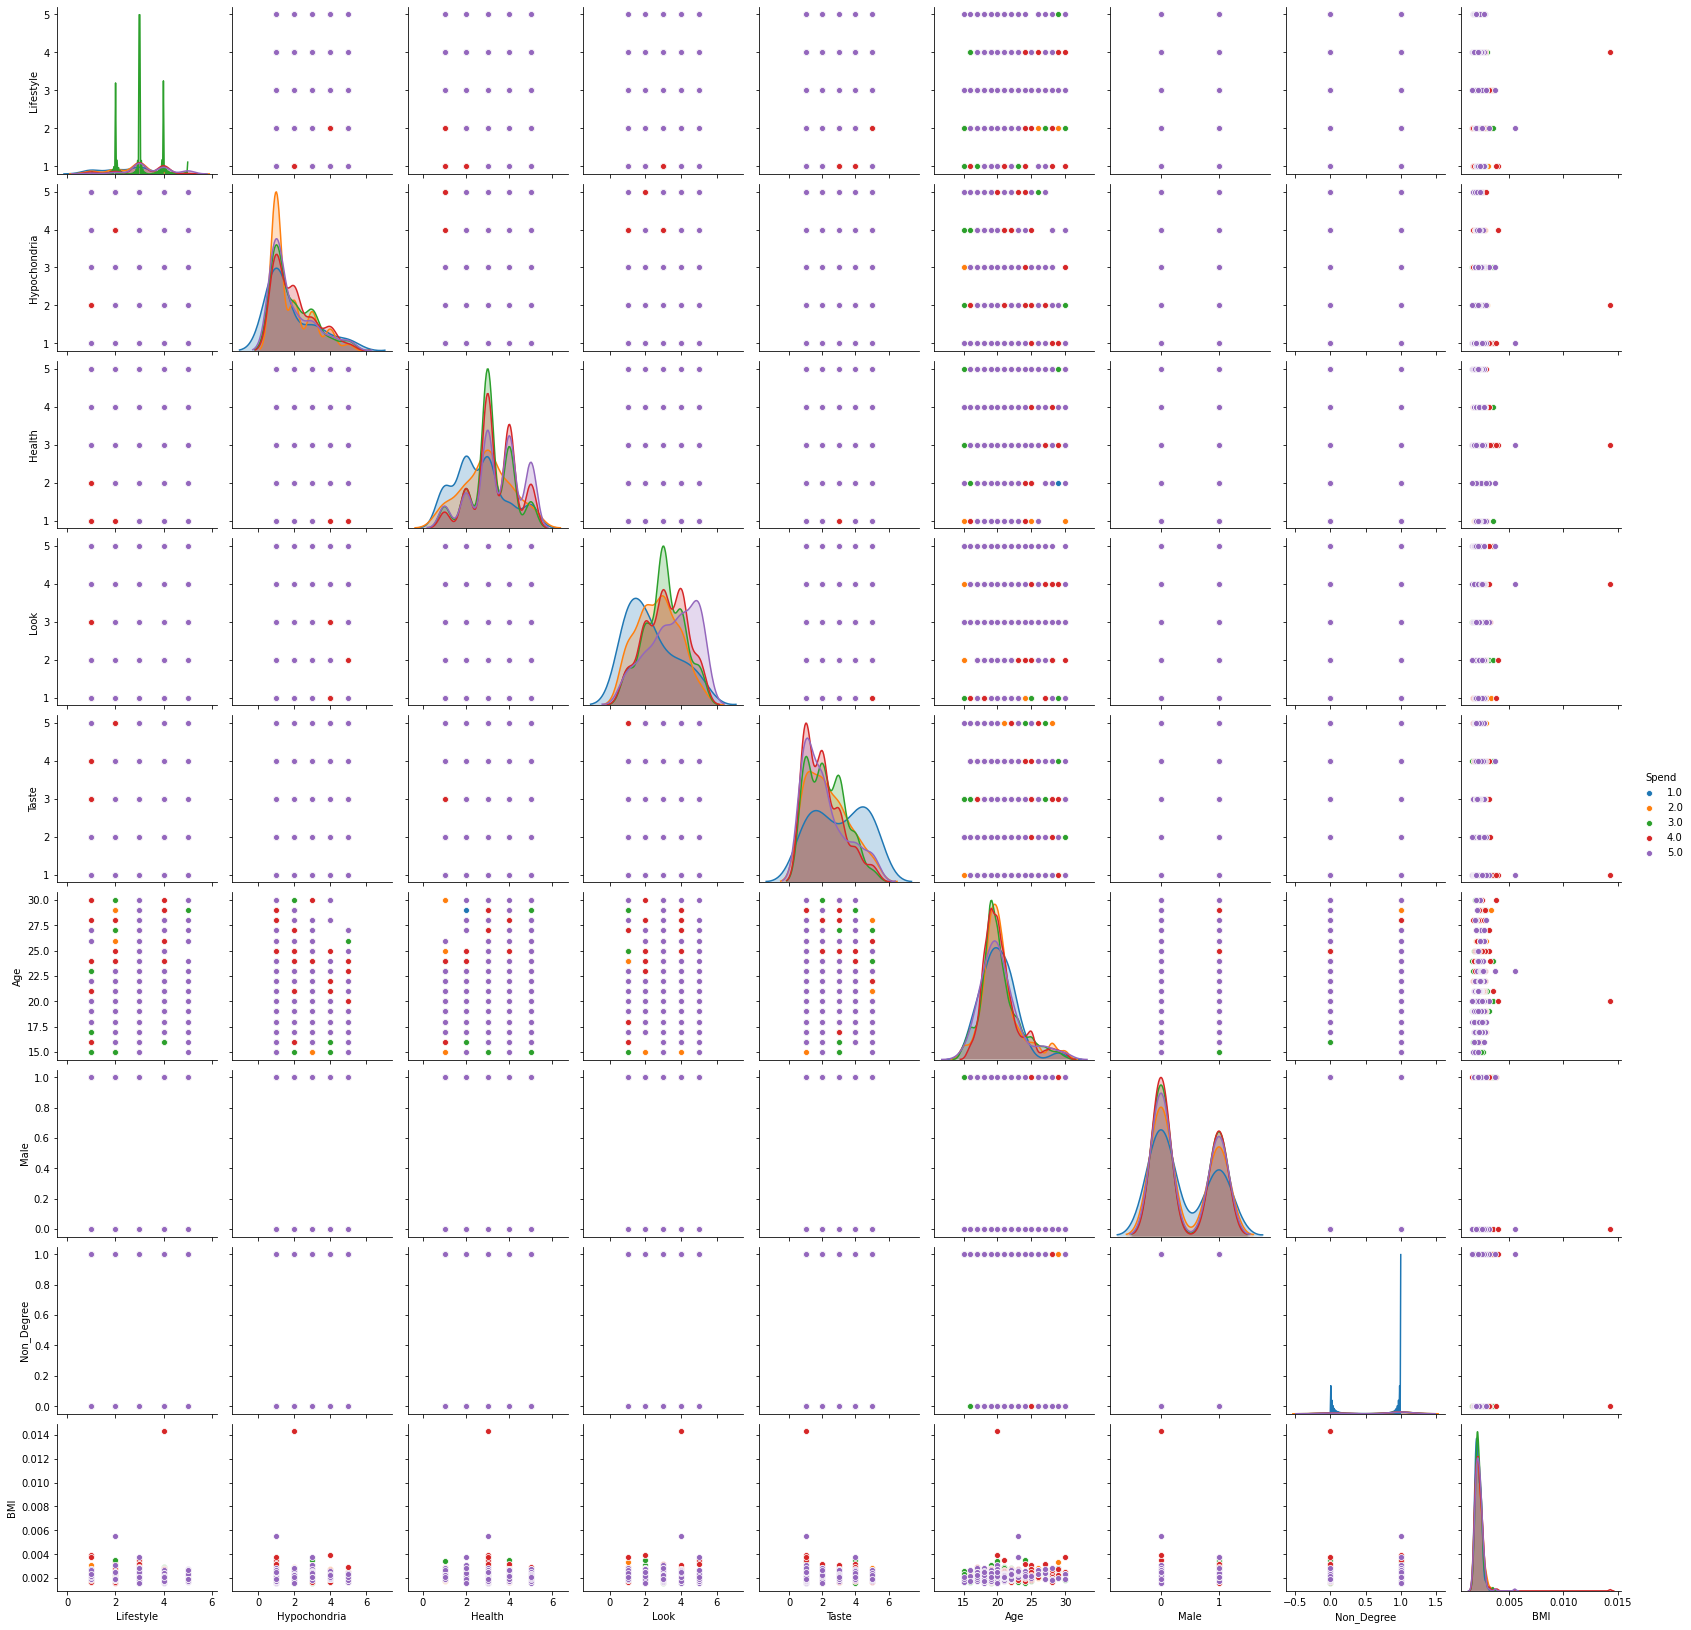

In [15]:
sns.pairplot(pd.concat([X_train, y_train], axis=1), hue='Spend')
plt.show()

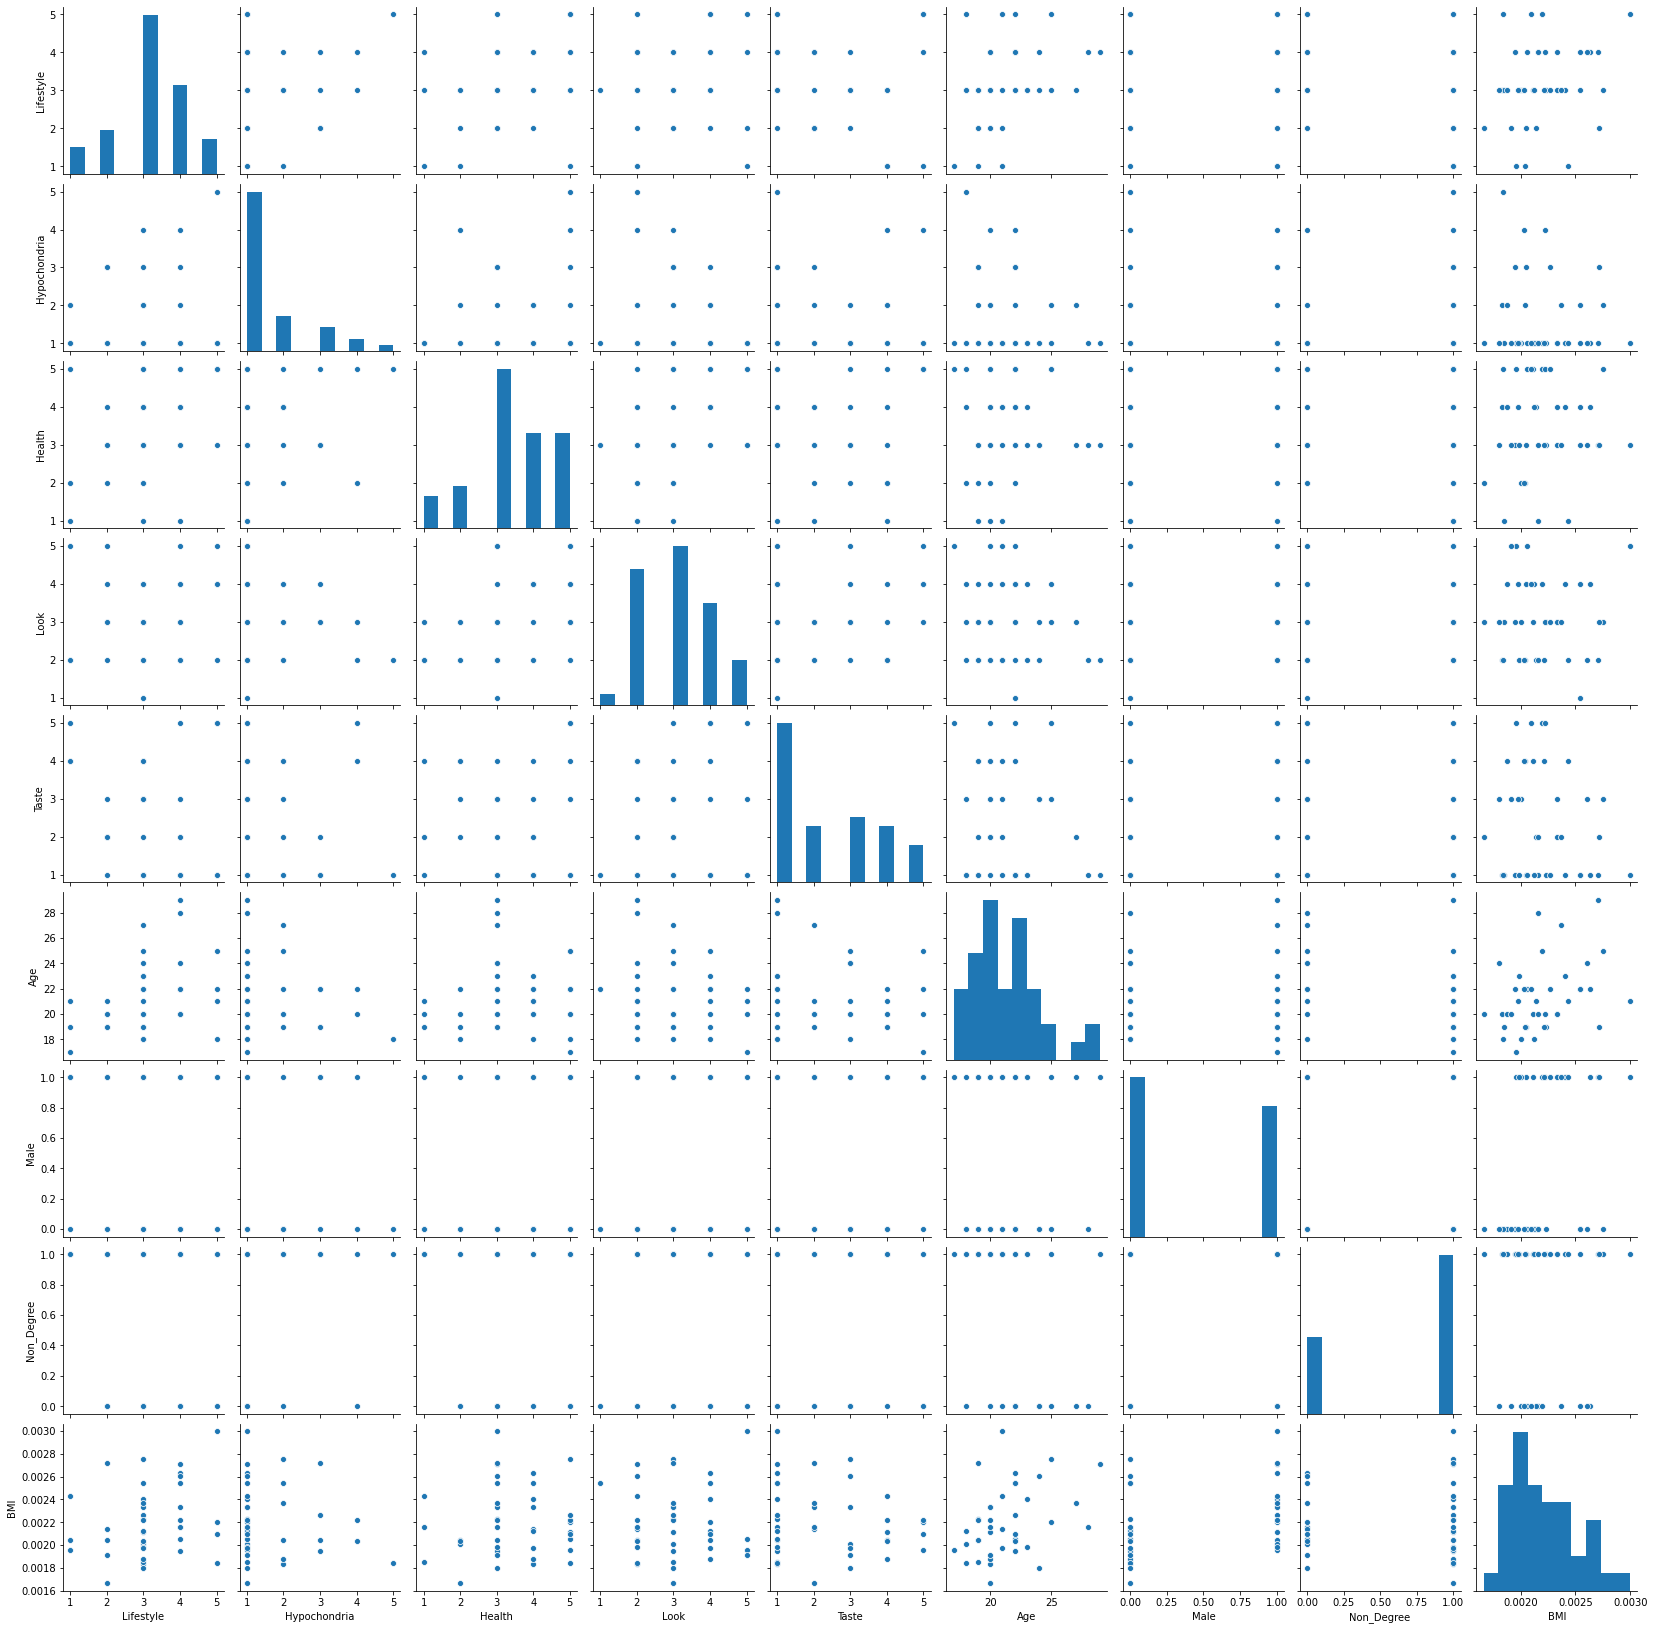

In [16]:
sns.pairplot(X_pred_)
plt.show()

> ### **2.4. Verify Engineered Features**

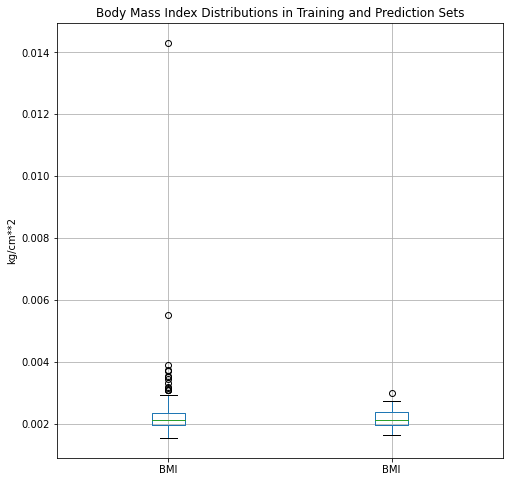

In [17]:
pd.concat([X_train.BMI, X_pred_.BMI], axis=1).boxplot(figsize=(8,8))
plt.ylabel('kg/cm**2')
plt.title('Body Mass Index Distributions in Training and Prediction Sets')
plt.show()

### **2.5. Verify Training, Prediction Dataset and All Features**

In [18]:
print('Sizes of training and prediction datasets:')
print(X_train.shape, y_train.shape, X_pred_.shape)
print('\n' + '* ' * 45)
print('Features of training dataset:')
print(X_train.columns.to_list())
print('\n' + '* ' * 45)
print('Features of prediction dataset:')
print(X_pred_.columns.to_list())

Sizes of training and prediction datasets:
(970, 9) (970,) (40, 9)

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Features of training dataset:
['Lifestyle', 'Hypochondria', 'Health', 'Look', 'Taste', 'Age', 'Male', 'Non_Degree', 'BMI']

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Features of prediction dataset:
['Lifestyle', 'Hypochondria', 'Health', 'Look', 'Taste', 'Age', 'Male', 'Non_Degree', 'BMI']


> ### **2.6. Apply PCA on Datasets**

In [19]:
from sklearn.decomposition import PCA
n_comps = 6
pca_train = PCA(n_components=n_comps)
pca_train.fit(X_train)
print(np.round(pca_train.explained_variance_ratio_ * 100, 0))
XPCA_train = pca_train.transform(X_train) 
print('\n' + '* ' * 20)
pca_pred_ = PCA(n_components=n_comps)
pca_pred_.fit(X_pred_)
print(np.round(pca_pred_.explained_variance_ratio_ * 100, 0))
XPCA_pred_ = pca_pred_.transform(X_train) 

[55. 12. 11.  8.  7.  5.]

* * * * * * * * * * * * * * * * * * * * 
[53. 15. 13.  8.  5.  3.]


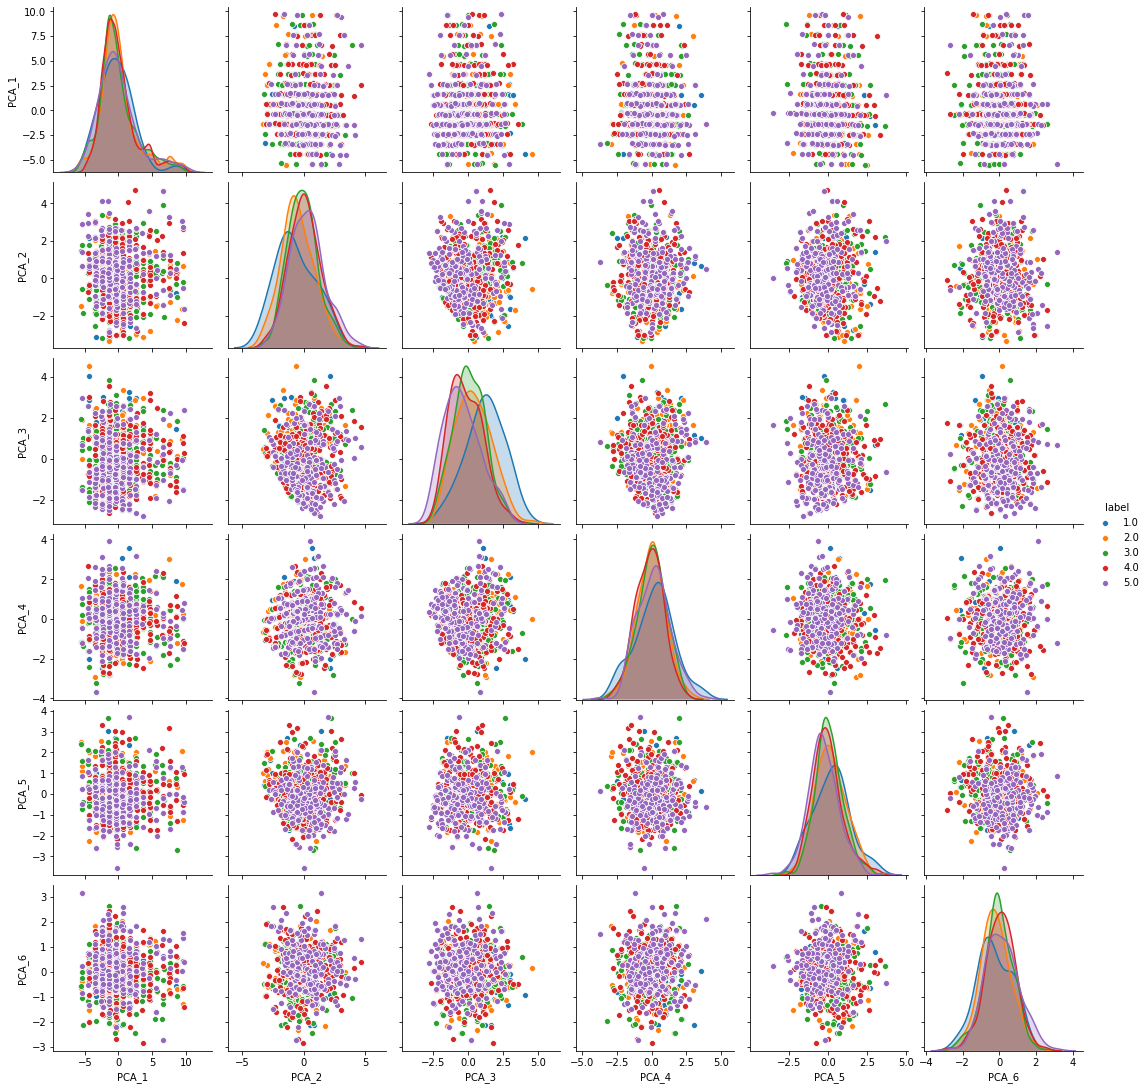

In [20]:
pca_names = ['PCA_{}'.format(k) for k in range(1, n_comps + 1)]
df_pca = pd.DataFrame(XPCA_train, columns=pca_names)
df_pca['label'] = y_train
sns.pairplot(df_pca, hue='label')
plt.show()

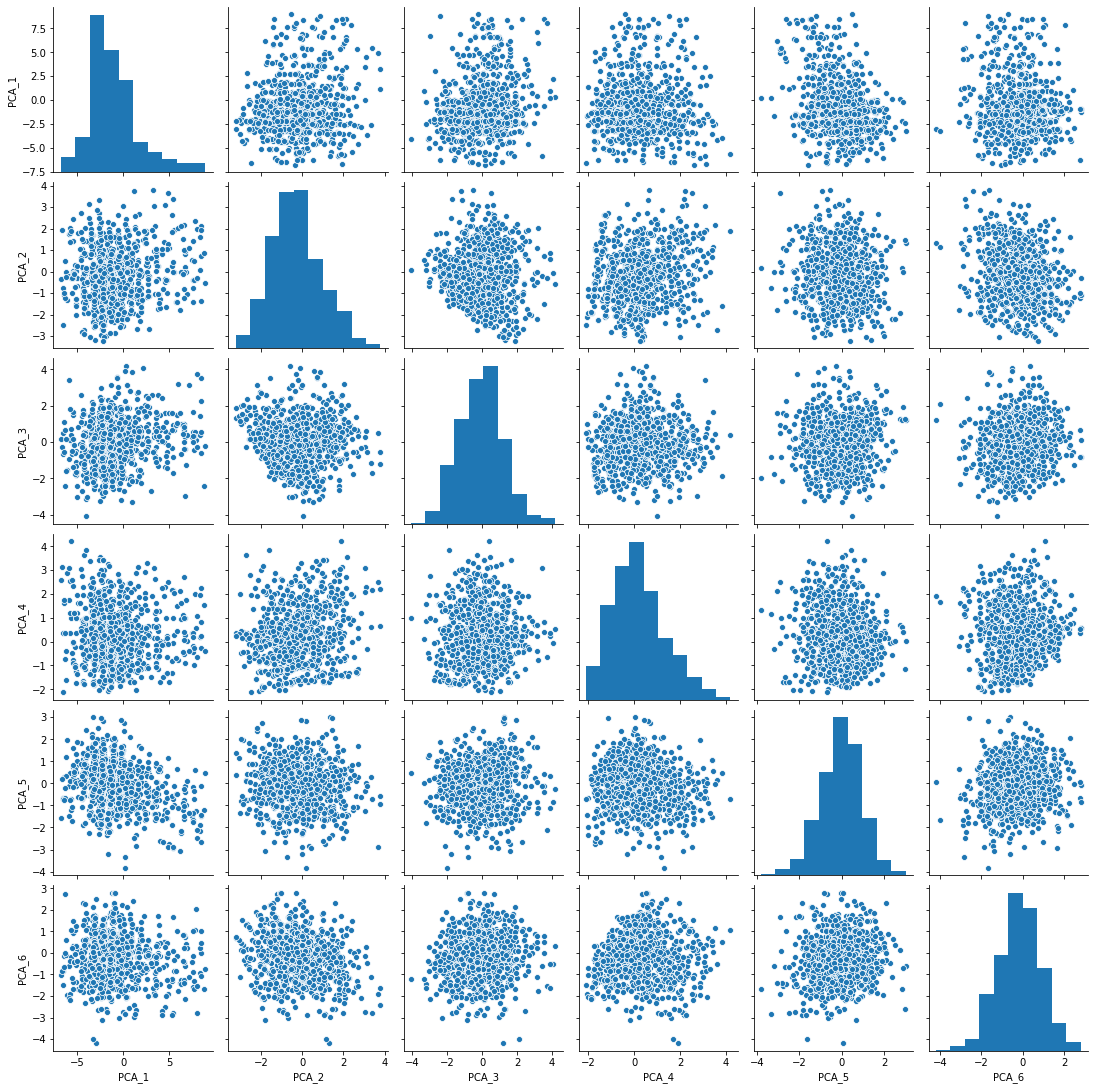

In [21]:
df_pca = pd.DataFrame(XPCA_pred_, columns=pca_names)
sns.pairplot(df_pca)
plt.show()

> ### **2.7. Scale Datasets**

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_pred__scaled = scaler.transform(X_pred_)

# **3. Train and Validate Baseline Models**
> ### **3.1. Set up Librabries and Helper Functions**

In [29]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
  
def get_models():
    models = {}
    # Logistic Regression
    models['LGR'] = LogisticRegression()
    # Support Vector Classifier
    models['SVC'] = SVC(gamma='auto')
    # KNearest Neighbors Classifier
    models['KNN'] = KNeighborsClassifier()
    # Bagging Classifier
    models['BAG'] = BaggingClassifier(n_estimators=100)
    # Random Forest Classifier
    models['RFR'] = RandomForestClassifier(n_estimators=100)
    # Extra Trees Classifier
    models['ETC'] = ExtraTreesClassifier(n_estimators=100)
    # Quadratic Discriminant Analysis
    models['QDA'] = QuadraticDiscriminantAnalysis()
    # Neural Network
    models['ANN'] = MLPClassifier()
    return models

def compute_score(model, X_train, y_train, X_test, y_test, strategy=False):
    # Call the strategy for the model
    STR = strategy(model) if strategy else model
    # Fit the training set to the classifier
    STR.fit(X_train, y_train)
    # Predict the label of the testing set 
    y_pred = STR.predict(X_test)
    # Calculate the accuracy of the prediction
    return accuracy_score(y_test, y_pred), confusion_matrix(y_test, y_pred)
print('Setup OK. Ready for training!')

Setup OK. Ready for training!


> ### **3.2. Train and Validate Models**

In [30]:
models = get_models()
model_accuracy = {}
# Number of classes in the target
m = len(y_train.unique())

# Evaluate each model using the splited datasets
for name, model in models.items():
    acc, cfm = [], np.zeros((m,m))
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1111)
    splits = kf.split(XPCA_train, y_train)
    for train_idx, test_idx in splits:
        X_train_sp, y_train_sp = XPCA_train[train_idx], y_train[train_idx]
        X_test__sp, y_test__sp = XPCA_train[test_idx],  y_train[test_idx]
        
        score = compute_score(model, X_train_sp, y_train_sp, 
                              X_test__sp, y_test__sp, OneVsOneClassifier)
        acc.append(score[0])
        cfm += score[1]
    model_accuracy[name] = acc
    acc = np.array(acc)
    print('Model\tAccuracy (Mean)\tAccuracy (STD)')
    print('{}\t{:.3f}\t\t{:.3f}'.format(name, np.mean(acc), np.std(acc)))
    print('\tConfusion Matrix:')
    print(cfm)
    print('\n' + '* ' * 15)

Model	Accuracy (Mean)	Accuracy (STD)
LGR	0.363		0.033
	Confusion Matrix:
[[  2.   7.  20.   9.   1.]
 [  7.   8.  54.  54.   4.]
 [  0.   6. 101. 144.  23.]
 [  1.  14.  72. 180.  49.]
 [  0.   2.  44. 107.  61.]]

* * * * * * * * * * * * * * * 
Model	Accuracy (Mean)	Accuracy (STD)
SVC	0.366		0.024
	Confusion Matrix:
[[  0.   3.  13.  17.   6.]
 [  0.   7.  56.  55.   9.]
 [  0.   7. 122. 122.  23.]
 [  0.   3. 107. 167.  39.]
 [  0.   0.  40. 115.  59.]]

* * * * * * * * * * * * * * * 
Model	Accuracy (Mean)	Accuracy (STD)
KNN	0.331		0.024
	Confusion Matrix:
[[  0.   8.  14.  14.   3.]
 [  2.  15.  48.  50.  12.]
 [  3.  23. 121.  97.  30.]
 [  0.  22. 113. 134.  47.]
 [  1.  12.  50. 100.  51.]]

* * * * * * * * * * * * * * * 
Model	Accuracy (Mean)	Accuracy (STD)
BAG	0.336		0.027
	Confusion Matrix:
[[  3.   7.  13.  13.   3.]
 [  4.  14.  51.  44.  14.]
 [  2.  22. 106.  98.  46.]
 [  5.  21.  84. 136.  70.]
 [  1.  14.  44.  88.  67.]]

* * * * * * * * * * * * * * * 
Model	Accuracy (

> ### **3.3. Visualize Accuracy Scores**

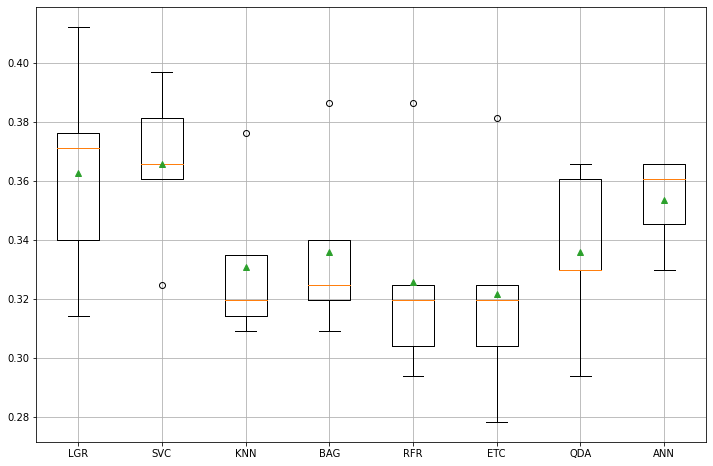

In [31]:
# Plot the accuracy scores
plt.boxplot(list(model_accuracy.values()), 
            labels=list(model_accuracy.keys()), showmeans=True)
plt.grid()
plt.gcf().set_size_inches(12, 8)
plt.show()

In [32]:
models = get_models()
model_accuracy = {}
# Number of classes in the target
m = len(y_train.unique())

# Evaluate each model using the splited datasets
for name, model in models.items():
    acc, cfm = [], np.zeros((m,m))
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1111)
    splits = kf.split(XPCA_train, y_train)
    for train_idx, test_idx in splits:
        X_train_sp, y_train_sp = XPCA_train[train_idx], y_train[train_idx]
        X_test__sp, y_test__sp = XPCA_train[test_idx],  y_train[test_idx]
        
        score = compute_score(model, X_train_sp, y_train_sp, 
                              X_test__sp, y_test__sp, OneVsRestClassifier)
        acc.append(score[0])
        cfm += score[1]
    model_accuracy[name] = acc
    acc = np.array(acc)
    print('Model\tAccuracy (Mean)\tAccuracy (STD)')
    print('{}\t{:.3f}\t\t{:.3f}'.format(name, np.mean(acc), np.std(acc)))
    print('\tConfusion Matrix:')
    print(cfm)
    print('\n' + '* ' * 15)

Model	Accuracy (Mean)	Accuracy (STD)
LGR	0.356		0.035
	Confusion Matrix:
[[  0.   4.  23.  11.   1.]
 [  4.   2.  58.  58.   5.]
 [  0.   2.  96. 150.  26.]
 [  0.   4.  74. 181.  57.]
 [  0.   1.  37. 110.  66.]]

* * * * * * * * * * * * * * * 
Model	Accuracy (Mean)	Accuracy (STD)
SVC	0.333		0.029
	Confusion Matrix:
[[  3.   7.  12.  12.   5.]
 [  7.  16.  44.  39.  21.]
 [  3.  20.  99. 113.  39.]
 [  3.  18.  87. 133.  75.]
 [  1.  13.  45.  83.  72.]]

* * * * * * * * * * * * * * * 
Model	Accuracy (Mean)	Accuracy (STD)
KNN	0.324		0.033
	Confusion Matrix:
[[  0.   3.  16.  17.   3.]
 [  3.  11.  44.  50.  19.]
 [  4.  16.  98. 110.  46.]
 [  2.  13.  92. 132.  77.]
 [  2.   7.  42.  90.  73.]]

* * * * * * * * * * * * * * * 
Model	Accuracy (Mean)	Accuracy (STD)
BAG	0.337		0.019
	Confusion Matrix:
[[  3.   7.  12.  15.   2.]
 [  5.  14.  46.  46.  16.]
 [  4.  26. 106.  99.  39.]
 [  6.  21.  95. 127.  67.]
 [  1.  15.  37.  84.  77.]]

* * * * * * * * * * * * * * * 
Model	Accuracy (

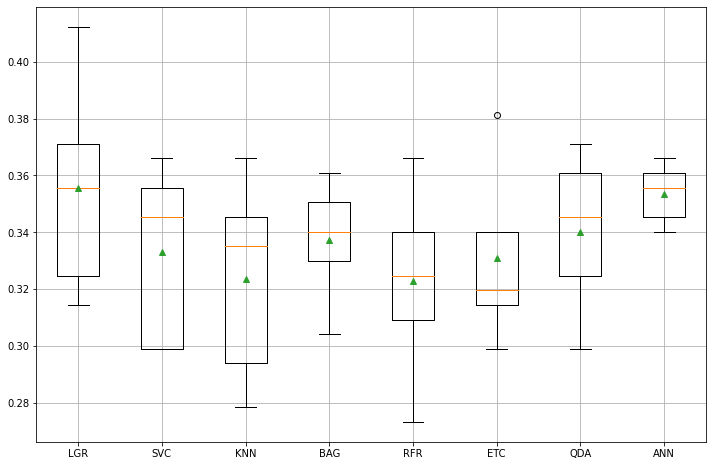

In [33]:
# Plot the accuracy scores
plt.boxplot(list(model_accuracy.values()), 
            labels=list(model_accuracy.keys()), showmeans=True)
plt.grid()
plt.gcf().set_size_inches(12, 8)
plt.show()

In [34]:
models = get_models()
model_accuracy = {}
# Number of classes in the target
m = len(y_train.unique())

# Evaluate each model using the splited datasets
for name, model in models.items():
    acc, cfm = [], np.zeros((m,m))
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1111)
    splits = kf.split(XPCA_train, y_train)
    for train_idx, test_idx in splits:
        X_train_sp, y_train_sp = XPCA_train[train_idx], y_train[train_idx]
        X_test__sp, y_test__sp = XPCA_train[test_idx],  y_train[test_idx]
        
        score = compute_score(model, X_train_sp, y_train_sp, X_test__sp, y_test__sp)
        acc.append(score[0])
        cfm += score[1]
    model_accuracy[name] = acc
    acc = np.array(acc)
    print('Model\tAccuracy (Mean)\tAccuracy (STD)')
    print('{}\t{:.3f}\t\t{:.3f}'.format(name, np.mean(acc), np.std(acc)))
    print('\tConfusion Matrix:')
    print(cfm)
    print('\n' + '* ' * 15)

Model	Accuracy (Mean)	Accuracy (STD)
LGR	0.365		0.031
	Confusion Matrix:
[[  3.   5.  21.  10.   0.]
 [  6.   6.  55.  53.   7.]
 [  1.   3. 102. 143.  25.]
 [  1.  10.  75. 173.  57.]
 [  0.   2.  40. 102.  70.]]

* * * * * * * * * * * * * * * 
Model	Accuracy (Mean)	Accuracy (STD)
SVC	0.368		0.021
	Confusion Matrix:
[[  0.   3.  13.  17.   6.]
 [  0.   8.  56.  54.   9.]
 [  0.   7. 124. 120.  23.]
 [  0.   3. 108. 166.  39.]
 [  0.   1.  40. 114.  59.]]

* * * * * * * * * * * * * * * 
Model	Accuracy (Mean)	Accuracy (STD)
KNN	0.310		0.020
	Confusion Matrix:
[[  1.  11.  15.  10.   2.]
 [  8.  18.  55.  36.  10.]
 [  8.  40. 126.  82.  18.]
 [  6.  29. 127. 120.  34.]
 [  4.  21.  65.  88.  36.]]

* * * * * * * * * * * * * * * 
Model	Accuracy (Mean)	Accuracy (STD)
BAG	0.319		0.024
	Confusion Matrix:
[[  5.   8.   9.  14.   3.]
 [  6.  15.  47.  43.  16.]
 [  4.  26.  98. 103.  43.]
 [  5.  22. 105. 121.  63.]
 [  1.  18.  43.  82.  70.]]

* * * * * * * * * * * * * * * 
Model	Accuracy (

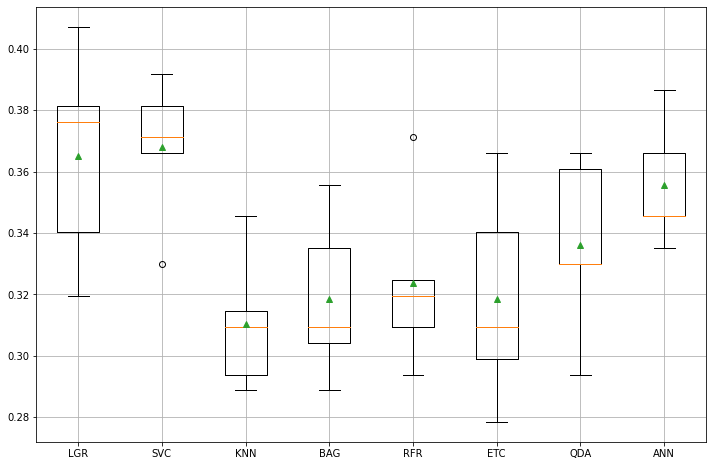

In [35]:
# Plot the accuracy scores
plt.boxplot(list(model_accuracy.values()), 
            labels=list(model_accuracy.keys()), showmeans=True)
plt.grid()
plt.gcf().set_size_inches(12, 8)
plt.show()